In [ ]:
import sys
!{sys.executable} -m pip install matplotlib imageio zarr

In [1]:
from multiscale_spatial_image import to_multiscale
from spatial_image import to_spatial_image
import imageio.v3 as iio
import zarr

In [2]:
name = 'chelsea'
with iio.imopen(f"imageio:{name}.png", "r") as image_file:
    props = image_file.properties()
    # props.spacing, if available, can be used to specify to_spatial_image `scale`
    array = image_file.read()

In [3]:
dims = ['y', 'x', 'c']
image = to_spatial_image(array, dims=dims, name=name, c_coords=['r', 'g', 'b'])
print(image)

<xarray.DataArray 'chelsea' (y: 300, x: 451, c: 3)> Size: 406kB
array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
...
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]], dtype=uint8)
Coordinates:
  * y        (y) float64 2kB 0.0 1.0 2.0 3.0 4.0 ... 296.0 297.0 298

In [4]:
multiscale = to_multiscale(image, [2,4])
print(multiscale)

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (y: 300, x: 451, c: 3)
│       Coordinates:
│         * y        (y) float64 2kB 0.0 1.0 2.0 3.0 4.0 ... 296.0 297.0 298.0 299.0
│         * x        (x) float64 4kB 0.0 1.0 2.0 3.0 4.0 ... 447.0 448.0 449.0 450.0
│         * c        (c) <U1 12B 'r' 'g' 'b'
│       Data variables:
│           chelsea  (y, x, c) uint8 406kB dask.array<chunksize=(256, 256, 3), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (y: 150, x: 225, c: 3)
│       Coordinates:
│         * y        (y) float64 1kB 0.5 2.5 4.5 6.5 8.5 ... 292.5 294.5 296.5 298.5
│         * x        (x) float64 2kB 1.5 3.5 5.5 7.5 9.5 ... 443.5 445.5 447.5 449.5
│         * c        (c) <U1 12B 'r' 'g' 'b'
│       Data variables:
│           chelsea  (y, x, c) uint8 101kB dask.array<chunksize=(150, 225, 3), meta=np.ndarray>
└── DataTree('scale2')
        Dimensions:  (y: 37, x: 56, c: 3)
        Coordinates:
          * y        (y) float64 296B 

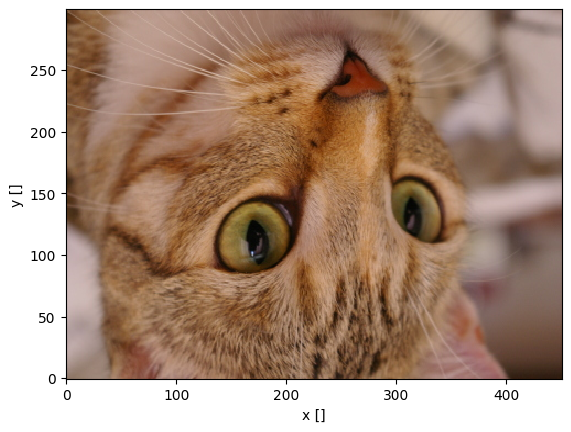

In [5]:
multiscale['scale0'].ds.chelsea.plot.imshow()

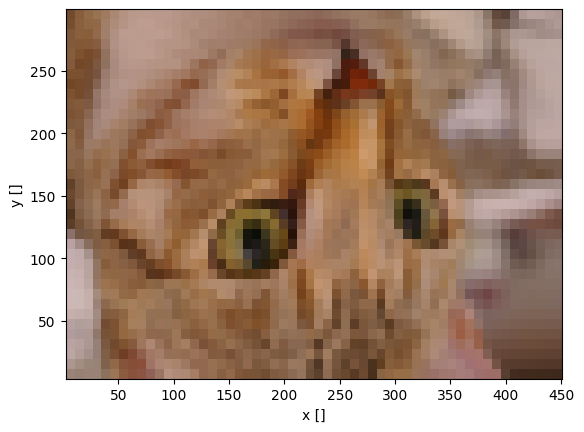

In [6]:
multiscale['scale2'].ds.chelsea.plot.imshow()

In [8]:
store = zarr.storage.DirectoryStore(f'{name}.zarr', dimension_separator='/')
multiscale.to_zarr(store, mode='w')